In [1]:
# for data manipulation and analysis
import pandas as pd;

# for numerical computing
import numpy as np

# for statistical analysis
from scipy import stats

# for splitting into train and test datasets
from sklearn.model_selection import train_test_split 

# for modelling
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# for balancing dataset by oversampling
from imblearn.over_sampling import SMOTE, ADASYN

# for performance metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_recall_curve
from sklearn.metrics import auc, roc_curve, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score

# for displaying plots in the notebook
%matplotlib inline 

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# QUESTION 2

# Data Loading

## I)

In [2]:
data = pd.read_csv("pulsar_stars.csv");
data.shape

(17898, 9)

In [3]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
# check if there are null values
data.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

Class 0: 16259
Class 1: 1639
Percentage: 9.16 % from target is class 1


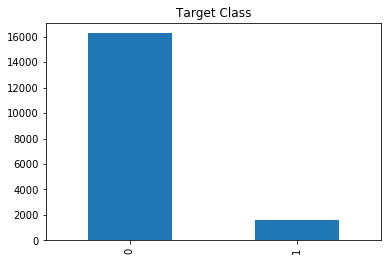

In [6]:
target_class = data.target_class.value_counts()
print('Class 0:', target_class[0])
print('Class 1:', target_class[1])
print('Percentage:', round(100 * target_class[1] / (target_class[0] + target_class[1]), 2), '% from target is class 1')

target_class.plot(kind='bar', title='Target Class');

# i

In [7]:
print('Shape: ',data.shape)

Shape:  (17898, 9)


In [8]:
# Class count
count_class_0, count_class_1 = data.target_class.value_counts()

# Divide by class
df_class_0 = data[data['target_class'] == 0]
df_class_1 = data[data['target_class'] == 1]

In [9]:
df_class_0.shape[0]

16259

In [10]:
df_class_1.shape[0]

1639

In [11]:
print('\nColumns: ',data.columns.values)


Columns:  [' Mean of the integrated profile'
 ' Standard deviation of the integrated profile'
 ' Excess kurtosis of the integrated profile'
 ' Skewness of the integrated profile' ' Mean of the DM-SNR curve'
 ' Standard deviation of the DM-SNR curve'
 ' Excess kurtosis of the DM-SNR curve' ' Skewness of the DM-SNR curve'
 'target_class']


In [12]:
y = data.iloc[:,8]
X = data.iloc[:,0:8]

print(X.columns)
print(y.head())

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')
0    0
1    0
2    0
3    0
4    0
Name: target_class, dtype: int64


In [13]:
X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size = 0.1)

X_train.shape

(16108, 8)

In [14]:
y_train.value_counts()

0    14646
1     1462
Name: target_class, dtype: int64

# ii + iii + iv

# (1) Random under-sampling 

Randomly remove samples from the majority class, with or without replacement.
This is one of the earliest techniques used to alleviate imbalance in the dataset, however, it may increase the variance of the classifier and may potentially discard useful or important samples.

Random under-sampling:
1    1639
0    1639
Name: target_class, dtype: int64


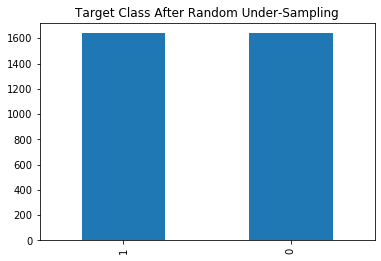

In [15]:
df_class_0_under = df_class_0.sample(count_class_1) # change size of class 0 to be equal to size of class 1
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target_class.value_counts())

df_test_under.target_class.value_counts().plot(kind='bar', title='Target Class After Random Under-Sampling');

In [16]:
y_under = df_test_under.iloc[:,8]
X_under = df_test_under.iloc[:,0:8]

columns = X_train.columns
X_under = pd.DataFrame(data = X_under, columns = columns)

print(X_train.shape)
print(X_under.shape)

(16108, 8)
(3278, 8)


In [17]:
# Initialising the models
rf_us = RandomForestClassifier(n_estimators=100)
xg_us = XGBClassifier()

# training the models
rf_us1 = rf_us.fit(X_under,y_under)
xg_us1 = xg_us.fit(X_under,y_under)

print("With Random Under-Sampling: \n")

# Making predictions on the test data
y_pred_rf1 = rf_us1.predict(X_test)
y_pred_xg1= xg_us1.predict(X_test)

print("RF - Accuracy - ",accuracy_score(y_test,y_pred_rf1))
print("XGBoost - Accuracy - ",accuracy_score(y_test,y_pred_xg1))

print("RF:\n",confusion_matrix(y_test,y_pred_rf1))
print("XGBoost:\n",confusion_matrix(y_test,y_pred_xg1))

p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf1)
p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,y_pred_xg1)

print("Random Forest:\n Precision: ",p_rf, "Recall: ", r_rf)
print("XGBoost:\n Precision: ",p_xg, "Recall: ", r_xg)

With Random Under-Sampling: 

RF - Accuracy -  0.9731843575418995
XGBoost - Accuracy -  0.9625698324022346
RF:
 [[1565   48]
 [   0  177]]
XGBoost:
 [[1560   53]
 [  14  163]]
Random Forest:
 Precision:  [1.         0.78666667] Recall:  [0.97024179 1.        ]
XGBoost:
 Precision:  [0.99110546 0.75462963] Recall:  [0.96714197 0.92090395]


# (2) Random over-sampling 

Random Oversampling involves supplementing the training data with multiple copies of some of the minority classes. Oversampling can be done more than once (2x, 3x, 5x, 10x, etc.)
This is one of the earliest proposed methods, that is also proven to be robust.
Instead of duplicating every sample in the minority class, some of them may be randomly chosen with replacement.

Random over-sampling:
1    16259
0    16259
Name: target_class, dtype: int64


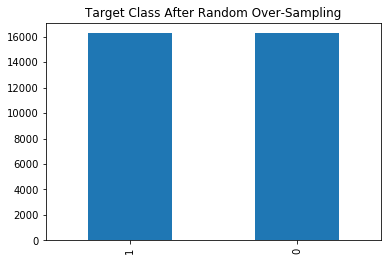

In [18]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)  # change size of class 1 to be equal to size of class 0
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target_class.value_counts())

df_test_over.target_class.value_counts().plot(kind='bar', title='Target Class After Random Over-Sampling');

In [19]:
y_over = df_test_over.iloc[:,8]
X_over = df_test_over.iloc[:,0:8]

columns = X_train.columns
X_over = pd.DataFrame(data = X_over, columns = columns)

print(X_train.shape)
print(X_over.shape)
print(np.unique(y_over, return_counts=True))

(16108, 8)
(32518, 8)
(array([0, 1]), array([16259, 16259]))


In [20]:
# Initialising the models
rf_os = RandomForestClassifier(n_estimators=100)
xg_os = XGBClassifier()

# training the models
rf_os1 = rf_os.fit(X_over,y_over)
xg_os1 = xg_os.fit(X_over,y_over)

print("With Random Over-Sampling: \n")

# Making predictions on the test data
y_pred_rf1 = rf_os1.predict(X_test)
y_pred_xg1= xg_os1.predict(X_test)

print("RF - Accuracy - ",accuracy_score(y_test,y_pred_rf1))
print("XGBoost - Accuracy - ",accuracy_score(y_test,y_pred_xg1))

print("RF:\n",confusion_matrix(y_test,y_pred_rf1))
print("XGBoost:\n",confusion_matrix(y_test,y_pred_xg1))

p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf1)
p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,y_pred_xg1)

print("Random Forest:\n Precision: ",p_rf, "Recall: ", r_rf)
print("XGBoost:\n Precision: ",p_xg, "Recall: ", r_xg)

With Random Over-Sampling: 

RF - Accuracy -  1.0
XGBoost - Accuracy -  0.964804469273743
RF:
 [[1613    0]
 [   0  177]]
XGBoost:
 [[1563   50]
 [  13  164]]
Random Forest:
 Precision:  [1. 1.] Recall:  [1. 1.]
XGBoost:
 Precision:  [0.99175127 0.76635514] Recall:  [0.96900186 0.92655367]


# (3) SMOTE

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way.
The module works by generating new instances from existing minority cases that you supply as input.
This implementation of SMOTE does not change the number of majority cases.
The new instances are not just copies of existing minority cases; instead, the algorithm takes samples of the feature space for each target class and its nearest neighbors, and generates new examples that combine features of the target case with features of its neighbors.
This approach increases the features available to each class and makes the samples more general.

In [21]:
# Oversampling and balancing using SMOTE
sm = SMOTE()
X_bal, y_bal = sm.fit_sample(X_train, y_train)

columns = X_train.columns
X_bal = pd.DataFrame(data = X_bal, columns = columns)

print(X_train.shape)
print(X_bal.shape)
print(np.unique(y_bal, return_counts=True))

(16108, 8)
(29292, 8)
(array([0, 1]), array([14646, 14646]))


# Models - Without Smote

In [22]:
# Using Random Forest and XGBoost
rf = RandomForestClassifier(n_estimators=100)
xg = XGBClassifier()

rf1 = rf.fit(X_train,y_train)
xg1 = xg.fit(X_train,y_train)

print("Without Smote: \n")

y_pred_rf = rf1.predict(X_test)
y_pred_xg= xg1.predict(X_test)

y_pred_rf_prob = rf1.predict_proba(X_test)
y_pred_xg_prob = xg1.predict_proba(X_test)

print("RF - Accuracy - ",accuracy_score(y_test,y_pred_rf))
print("XGBoost - Accuracy - ",accuracy_score(y_test,y_pred_xg))

print("RF:\n",confusion_matrix(y_test,y_pred_rf))
print("XGBoost:\n",confusion_matrix(y_test,y_pred_xg))

fpr_rf1, tpr_rf1, thresholds = roc_curve(y_test,
                                 y_pred_rf_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_xg1, tpr_xg1, thresholds = roc_curve(y_test,
                                 y_pred_xg_prob[: , 1],
                                 pos_label= 1
                                 )

print("RF - AUC: ",auc(fpr_rf1,tpr_rf1))
print("XGBoost - AUC: ",auc(fpr_xg1,tpr_xg1))

p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf)
p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,y_pred_xg)

print("Random Forest:\n Precision: ",p_rf, "Recall: ", r_rf)
print("XGBoost:\n Precision: ",p_xg, "Recall: ", r_xg)

Without Smote: 

RF - Accuracy -  0.9782122905027933
XGBoost - Accuracy -  0.9815642458100559
RF:
 [[1599   14]
 [  25  152]]
XGBoost:
 [[1601   12]
 [  21  156]]
RF - AUC:  0.9631297263407134
XGBoost - AUC:  0.9819825499735553
Random Forest:
 Precision:  [0.98460591 0.91566265] Recall:  [0.99132052 0.85875706]
XGBoost:
 Precision:  [0.98705302 0.92857143] Recall:  [0.99256045 0.88135593]


# Models - With Smote

In [23]:
# Initialising the models
rf_sm = RandomForestClassifier(n_estimators=100)
xg_sm = XGBClassifier()

# training the models
rf_sm1 = rf_sm.fit(X_bal,y_bal)
xg_sm1 = xg_sm.fit(X_bal,y_bal)

print("With Smote: \n")

# Making predictions on the test data
y_pred_rf1 = rf_sm1.predict(X_test)
y_pred_xg1= xg_sm1.predict(X_test)

y_pred_rf_prob1 = rf_sm1.predict_proba(X_test)
y_pred_xg_prob1 = xg_sm1.predict_proba(X_test)

print("RF - Accuracy - ",accuracy_score(y_test,y_pred_rf1))
print("XGBoost - Accuracy - ",accuracy_score(y_test,y_pred_xg1))

print("RF:\n",confusion_matrix(y_test,y_pred_rf1))
print("XGBoost:\n",confusion_matrix(y_test,y_pred_xg1))

fpr_rf2, tpr_rf2, thresholds = roc_curve(y_test,
                                 y_pred_rf_prob1[: , 1],
                                 pos_label= 1
                                 )

fpr_xg2, tpr_xg2, thresholds = roc_curve(y_test,
                                 y_pred_xg_prob1[: , 1],
                                 pos_label= 1
                                 )

print("RF - AUC: ",auc(fpr_rf2,tpr_rf2))
print("XGBoost - AUC: ",auc(fpr_xg2,tpr_xg2))

p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf1)
p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,y_pred_xg1)

print("Random Forest:\n Precision: ",p_rf, "Recall: ", r_rf)
print("XGBoost:\n Precision: ",p_xg, "Recall: ", r_xg)

With Smote: 

RF - Accuracy -  0.9743016759776536
XGBoost - Accuracy -  0.9614525139664805
RF:
 [[1586   27]
 [  19  158]]
XGBoost:
 [[1560   53]
 [  16  161]]
RF - AUC:  0.9803310671416212
XGBoost - AUC:  0.9838511949170055
Random Forest:
 Precision:  [0.98816199 0.85405405] Recall:  [0.983261   0.89265537]
XGBoost:
 Precision:  [0.98984772 0.75233645] Recall:  [0.96714197 0.90960452]


## As can be seen from the results - results (recall, precision) were improved in both RF & XGBoost (Recall & Precision) after SMOTE!

# (4) ADASYN

The adaptive synthetic sampling approach, or ADASYN algorithm, builds on the methodology of SMOTE, by shifting the importance of the classification boundary to those minority classes which are difficult.
ADASYN uses a weighted distribution for different minority class examples according to their level of difficulty in learning, where more synthetic data is generated for minority class examples that are harder to learn.

# Models - With ADASYN

In [24]:
# oversampling and balancing dataset with ADASYN
ad = ADASYN()
X_ad, y_ad = ad.fit_sample(X_train, y_train)
 
X_ad = pd.DataFrame(data = X_ad, columns = X_train.columns)

print(X_train.shape)
print(X_ad.shape)
print(np.unique(y_bal, return_counts=True))

(16108, 8)
(29172, 8)
(array([0, 1]), array([14646, 14646]))


In [25]:
# Initialising the models
rf_ad = RandomForestClassifier(n_estimators=100)
xg_ad = XGBClassifier()

# training the models
rf_ad1 = rf_ad.fit(X_ad,y_ad)
xg_ad1 = xg_ad.fit(X_ad,y_ad)

In [26]:
print("With ADASYN:\n")
# Making predictions on the test data
y_pred_rf2 = rf_ad1.predict(X_test)
y_pred_xg2 = xg_ad1.predict(X_test)

y_pred_rf_prob2 = rf_ad1.predict_proba(X_test)
y_pred_xg_prob2 = xg_ad1.predict_proba(X_test)

print("RF - Accuracy - ",accuracy_score(y_test,y_pred_rf2))
print("XGBoost - Accuracy - ",accuracy_score(y_test,y_pred_xg2))

print("RF:\n",confusion_matrix(y_test,y_pred_rf2))
print("XGBoost:\n",confusion_matrix(y_test,y_pred_xg2))

fpr_rf3, tpr_rf3, thresholds = roc_curve(y_test,
                                 y_pred_rf_prob2[: , 1],
                                 pos_label= 1
                                 )

fpr_xg3, tpr_xg3, thresholds = roc_curve(y_test,
                                 y_pred_xg_prob2[: , 1],
                                 pos_label= 1
                                 )

print("RF - AUC: ",auc(fpr_rf3,tpr_rf3))
print("XGBoost - AUC: ",auc(fpr_xg3,tpr_xg3))

p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf2)
p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,y_pred_xg2)

print("Random Forest:\n Precision: ",p_rf, "Recall: ", r_rf)
print("XGBoost:\n Precision: ",p_xg, "Recall: ", r_xg)

With ADASYN:

RF - Accuracy -  0.9670391061452513
XGBoost - Accuracy -  0.8988826815642458
RF:
 [[1571   42]
 [  17  160]]
XGBoost:
 [[1441  172]
 [   9  168]]
RF - AUC:  0.9792820340384097
XGBoost - AUC:  0.981625283273964
Random Forest:
 Precision:  [0.98929471 0.79207921] Recall:  [0.97396156 0.9039548 ]
XGBoost:
 Precision:  [0.9937931  0.49411765] Recall:  [0.8933664  0.94915254]


## As can be seen from the results - results were improved in both RF & XGBoost (Recall & Precision) after ADASYN!

# (5) Combine Approach (Bonus: up to 5 points)
### Over-sampling using SMOTE followed by under-sampling removing the Tomek’s links

In [27]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek

print('Original dataset shape %s' % Counter(y))

smt = SMOTETomek()
X_combine, y_combine = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_combine))

Original dataset shape Counter({0: 16259, 1: 1639})
Resampled dataset shape Counter({0: 14507, 1: 14507})


In [28]:
X_combine = pd.DataFrame(data = X_combine, columns = X_train.columns)
y_combine = pd.DataFrame(data = y_combine)

df_combine = pd.concat([X_combine, y_combine], axis=1)

In [29]:
df_combine.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,0
0,131.382812,47.855270,-0.025672,0.067294,2.235786,14.700338,9.292078,108.866394,0
1,126.765625,50.602230,0.018513,-0.021403,3.520067,22.312026,7.119706,54.903269,0
2,118.140625,52.933292,0.300603,-0.249694,14.418896,49.915607,3.357507,9.824089,0
3,134.328125,42.006902,-0.223974,0.174592,2.209866,15.243517,9.729774,113.742010,0
4,136.390625,48.509702,0.030031,0.042847,2.959866,20.962701,8.066180,71.096368,0


In [30]:
df_combine.rename(columns={0: "target_class"}, inplace=True)

In [31]:
df_combine.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,131.382812,47.855270,-0.025672,0.067294,2.235786,14.700338,9.292078,108.866394,0
1,126.765625,50.602230,0.018513,-0.021403,3.520067,22.312026,7.119706,54.903269,0
2,118.140625,52.933292,0.300603,-0.249694,14.418896,49.915607,3.357507,9.824089,0
3,134.328125,42.006902,-0.223974,0.174592,2.209866,15.243517,9.729774,113.742010,0
4,136.390625,48.509702,0.030031,0.042847,2.959866,20.962701,8.066180,71.096368,0


Combine sampling:
1    14507
0    14507
Name: target_class, dtype: int64
(16108, 8)
(29014, 8)


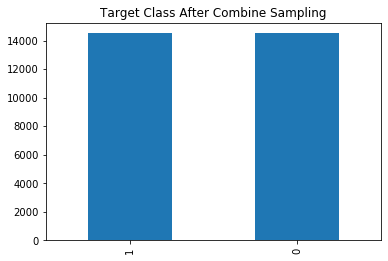

In [32]:
df_class_0_combine = df_combine[df_combine['target_class'] == 0]
df_class_1_combine = df_combine[df_combine['target_class'] == 1]
df_test_combine = pd.concat([df_class_0_combine, df_class_1_combine], axis=0)

print('Combine sampling:')
print(df_test_combine['target_class'].value_counts())

df_test_combine['target_class'].value_counts().plot(kind='bar', title='Target Class After Combine Sampling');

y_test = df_test_combine.iloc[:,8]
X_test = df_test_combine.iloc[:,0:8]

columns = X_combine.columns
X_combine = pd.DataFrame(data = X_combine, columns = columns)

print(X_train.shape)
print(X_combine.shape)

In [33]:
# Initialising the models
rf_co = RandomForestClassifier(n_estimators=100)
xg_co = XGBClassifier()

# training the models
rf_co5 = rf_co.fit(X_combine,y_combine.values.ravel())
xg_co5 = xg_co.fit(X_combine,y_combine.values.ravel())

print("With Combine-Sampling: \n")

# Making predictions on the test data
y_pred_rf5 = rf_co5.predict(X_test)
y_pred_xg5= xg_co5.predict(X_test)

print("RF - Accuracy - ",accuracy_score(y_test,y_pred_rf5))
print("XGBoost - Accuracy - ",accuracy_score(y_test,y_pred_xg5))

print("RF:\n",confusion_matrix(y_test,y_pred_rf5))
print("XGBoost:\n",confusion_matrix(y_test,y_pred_xg5))

p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf5)
p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,y_pred_xg5)

print("Random Forest:\n Precision: ",p_rf, "Recall: ", r_rf)
print("XGBoost:\n Precision: ",p_xg, "Recall: ", r_xg)

With Combine-Sampling: 

RF - Accuracy -  1.0
XGBoost - Accuracy -  0.9577790032398152
RF:
 [[14507     0]
 [    0 14507]]
XGBoost:
 [[14193   314]
 [  911 13596]]
Random Forest:
 Precision:  [1. 1.] Recall:  [1. 1.]
XGBoost:
 Precision:  [0.93968485 0.97742631] Recall:  [0.97835528 0.93720273]


# ROC curves: imbalanced VS smote VS adasyn

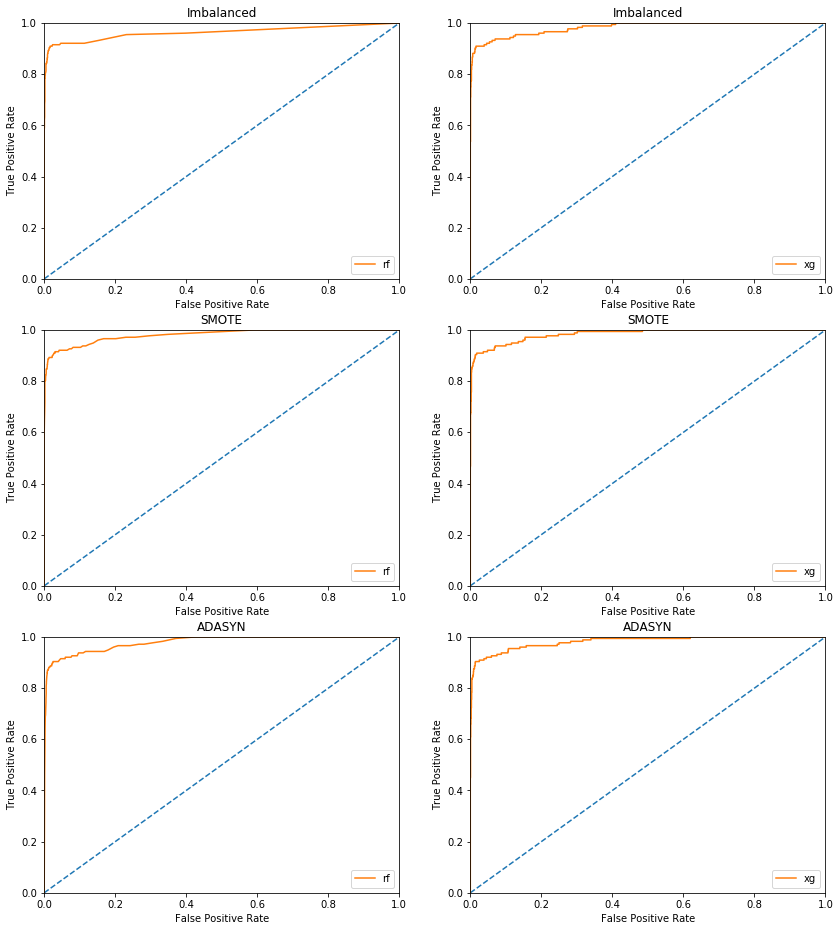

In [34]:
fig = plt.figure(figsize=(14,16))   # Create window frame


roc = [["Imbalanced", fpr_rf1, tpr_rf1,'rf'],["Imbalanced", fpr_xg1, tpr_xg1,'xg'],["SMOTE", fpr_rf2, tpr_rf2,'rf'],["SMOTE", fpr_xg2, tpr_xg2,'xg'],
["ADASYN", fpr_rf3, tpr_rf3,'rf'], ["ADASYN", fpr_xg3, tpr_xg3,'xg']]

for i in range(6):
    #8.1 Connect diagonals
    ax = fig.add_subplot(3,2,i+1) 
    ax.plot([0, 1], [0, 1], ls="--")  # Dashed diagonal line

    #8.2 Labels 
    ax.set_xlabel('False Positive Rate')  # Final plot decorations
    ax.set_ylabel('True Positive Rate')
    ax.set_title(roc[i][0])

    #8.3 Set graph limits
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])

    #8.4 Plot each graph now
    ax.plot(roc[i][1], roc[i][2], label = roc[i][3])

    #8.5 Set legend and show plot
    ax.legend(loc="lower right")

# Precision - Recall curves: imbalanced VS smote VS adasyn

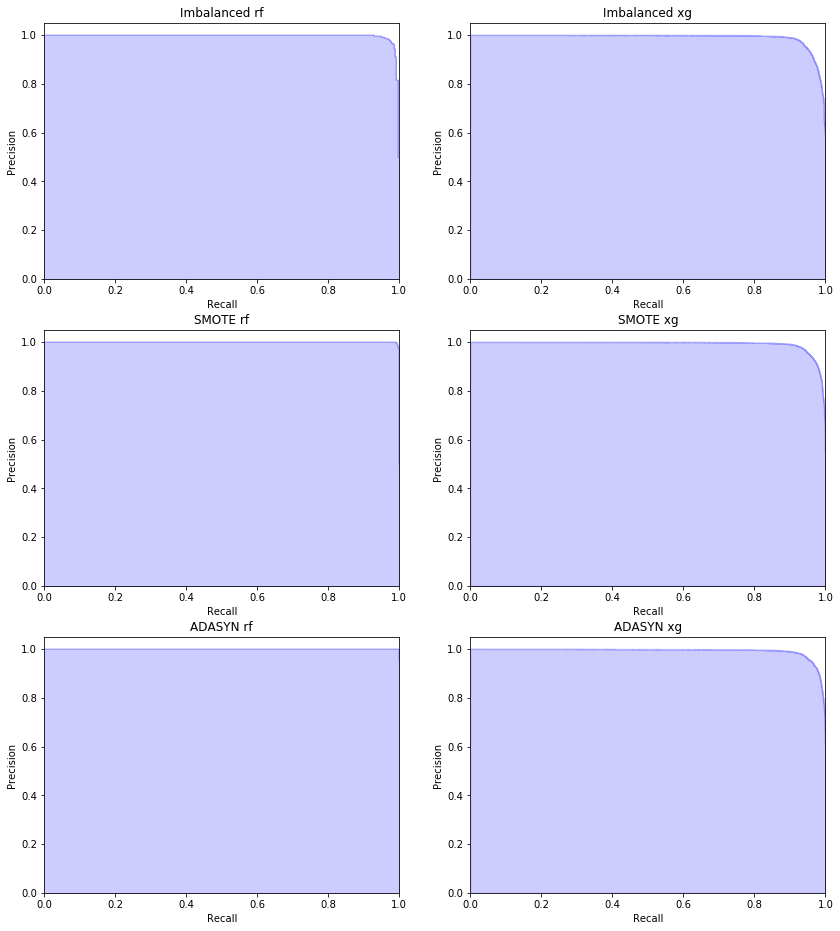

In [35]:
prc = [["Imbalanced", rf1,'rf'],["Imbalanced", xg1,'xg'],["SMOTE", rf_sm1,'rf'],["SMOTE", xg_sm1,'xg'],
["ADASYN", rf_ad1,'rf'], ["ADASYN", xg_ad1,'xg']]

fig = plt.figure(figsize=(14,16))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
   
    precision, recall, _ = precision_recall_curve(y_test,prc[i][1].predict_proba(X_test)[:,-1])

    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    ttl = prc[i][0]+' '+prc[i][2]
    plt.title(ttl)

# As can be seen in graphs, results were improved after using Smote & ADASYN!

# Bonus - 3 Points
## Accuracy is no longer a proper measure, since it does not distinguish between the numbers of correctly classified examples of different classes. Hence, it may lead to erroneous conclusions

# v

The general formula for the F-score is the following:

Fβ = ((1+β^2) ⋅ precision ⋅ recall) / ((β^2 ⋅ precision) + recall)

where β is a positive real.

For the F2 score, β equal to 2.
The intuition behind the F2 score is that it weights recall higher than precision.
This makes the F2 score more suitable in certain applications where it’s more important to classify correctly as many positive samples as possible, rather than maximizing the number of correct classifications.

F1 Score: It is a harmonic mean of precision and recall given by
F1 = 2 * Precision * Recall / (Precision + Recall)

### The conclusion is that F2 score is better for imbalanced data problems compared to F1 score!

# QUESTION 3

In [36]:
# 3) i, ii Same DB as question 2

In [37]:
#4 i (1), (2), (3), (4)

In [38]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# PCA

### split the dataframe into X and y values

In [39]:
y = data.iloc[:,8]
x = data.iloc[:,0:8]

### Standardizing the features, mean = 0, std = 1

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(x)

In [41]:
# x
x.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [42]:
# y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_class, dtype: int64

In [43]:
# X_std
pd.DataFrame(data=X_std).head()

,0,1,2,3,4,5,6,7
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # PCA with 2 primary components

# fit and transform both PCA models
X_pca = pca.fit_transform(X_std)

In [45]:
# X_pca
pd.DataFrame(data=X_pca).head()

,0,1
0,-1.278849,-1.273133
1,-1.020553,-0.201162
2,0.188289,0.432114
3,-1.015466,-1.469881
4,-0.822626,2.123651


### PCA visualization without target values

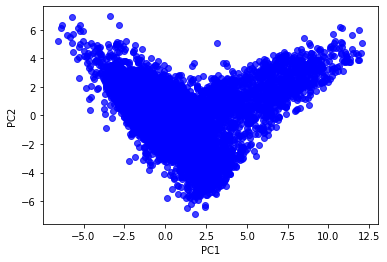

In [46]:
plt.scatter(X_pca.T[0], X_pca.T[1], alpha=0.75, c='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### PCA visualization with target values

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Principal Component 1', 'Principal Component 2'])

final_df = pd.concat([principalDf, y], axis = 1)

final_df.head()

,Principal Component 1,Principal Component 2,target_class
0,-27.191086,-29.677875,0
1,24.476215,-6.024175,0
2,-39.938920,-10.828048,0
3,-48.000825,-29.833257,0
4,147.919433,18.562548,0


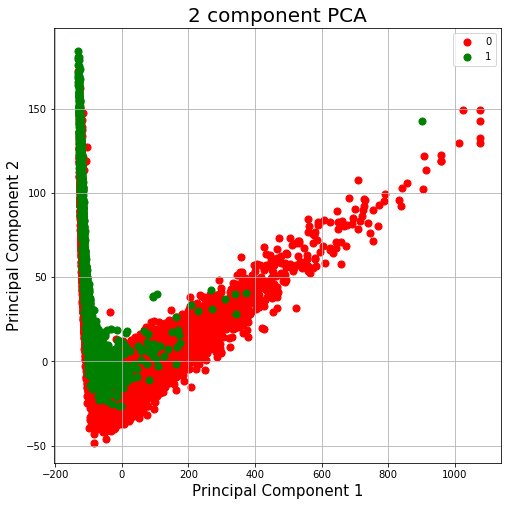

In [48]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(final_df.loc[indicesToKeep, 'Principal Component 1']
               , final_df.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# K-Means
## Partitioning-based clustering

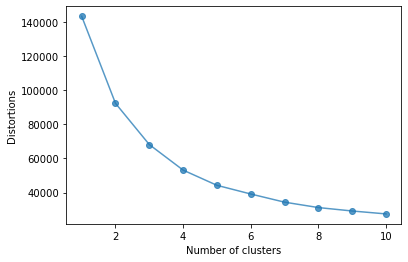

In [49]:
from sklearn.cluster import KMeans

distortions = [] # sum of squared error within the each cluster
for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X_std)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o', alpha=0.75)
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

In [50]:
# the ideal situation is the “elbow” where the plot makes a sharp turn, thus indicating a good approximation for the optimal number of clusters to choose.

### Due to these results, we will choose 4 clusters

In [51]:
km = KMeans(n_clusters=4,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km = km.fit_predict(X_pca)

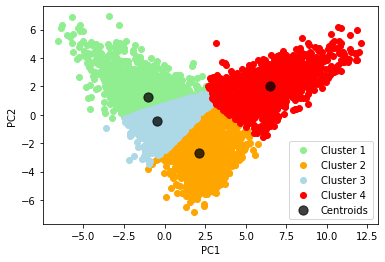

In [52]:
plt.scatter(X_pca[y_km==0, 0],
           X_pca[y_km==0, 1],
           c='lightgreen',
           label='Cluster 1')
plt.scatter(X_pca[y_km==1, 0],
           X_pca[y_km==1, 1],
           c='orange',
           label='Cluster 2')
plt.scatter(X_pca[y_km==2, 0],
           X_pca[y_km==2, 1],
           c='lightblue',
           label='Cluster 3')
plt.scatter(X_pca[y_km==3, 0],
           X_pca[y_km==3, 1],
           c='red',
           label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=85,
           alpha=0.75,
           marker='o',
           c='black',
           label='Centroids')

plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### External Clustering Evaluation - comparing to ground truth

In [53]:
import warnings
warnings.filterwarnings('ignore')

print(confusion_matrix(y, y_km ))
print(round(accuracy_score(y, y_km),2)*100)
print(classification_report(y, y_km))

[[5263 1300 9680   16]
 [  93  312  247  987]
 [   0    0    0    0]
 [   0    0    0    0]]
31.0
              precision    recall  f1-score   support

           0       0.98      0.32      0.49     16259
           1       0.19      0.19      0.19      1639
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.31     17898
   macro avg       0.29      0.13      0.17     17898
weighted avg       0.91      0.31      0.46     17898



# DB Scan
## Density-based clustering

In [54]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [55]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)

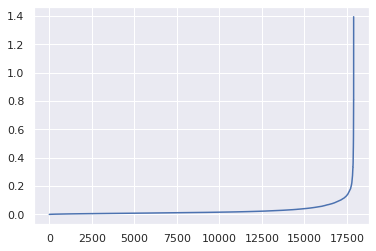

In [56]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [57]:
# The optimal value for epsilon will be found at the point of maximum curvature.

### Due to these results, we will choose eps = 0.2

In [58]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2, min_samples=20)
y_dbs = dbs.fit_predict(X_pca)

In [59]:
clusters = dbs.labels_

In [60]:
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 2403


In [61]:
counts = np.bincount(clusters[clusters>=0])
print(counts)

[15096   347    25    27]


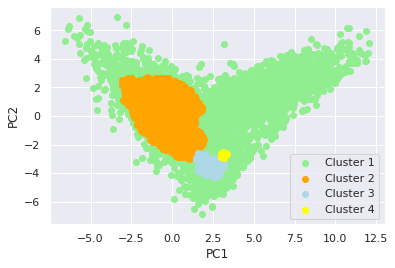

In [62]:
plt.scatter(X_pca[y_dbs==-1, 0],
           X_pca[y_dbs==-1, 1],
           c='lightgreen',
           label='Cluster 1')
plt.scatter(X_pca[y_dbs==0, 0],
           X_pca[y_dbs==0, 1],
           c='orange',
           label='Cluster 2')
plt.scatter(X_pca[y_dbs==1, 0],
           X_pca[y_dbs==1, 1],
           c='lightblue',
           label='Cluster 3')
plt.scatter(X_pca[y_dbs==2, 0],
           X_pca[y_dbs==2, 1],
           c='yellow',
           label='Cluster 4')

plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### External Clustering Evaluation - comparing to ground truth

In [63]:
import warnings
warnings.filterwarnings('ignore')

print(confusion_matrix(y, y_dbs ))
print(round(accuracy_score(y, y_dbs),2)*100)
print(classification_report(y, y_dbs))

[[    0     0     0     0     0]
 [ 1023 14844   343    22    27]
 [ 1380   252     4     3     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]]
83.0
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.98      0.91      0.95     16259
           1       0.01      0.00      0.00      1639
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.83     17898
   macro avg       0.20      0.18      0.19     17898
weighted avg       0.89      0.83      0.86     17898



### As can be seen while comparing two clustering methods results - db scan results are better than k-means for this dataset!